In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

from lib.utils import save_keras_model

In [2]:
i1 = keras.layers.Input(shape=(1,), name="i1")
i2 = keras.layers.Input(shape=(1,), name="i2")
x = keras.layers.Concatenate()([i1, i2])
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dense(1, activation="linear")(x)
m = keras.models.Model(inputs=[i1, i2], outputs=x)

In [3]:
m.compile(optimizer="adam", loss="mse")

In [4]:
save_keras_model(m, "model.jpg")

In [14]:
class G(keras.utils.Sequence):
    n = 1024 * 1000

    def __init__(self, batch_size=10):
        self.x1 = np.random.uniform(-100, 100, self.n)
        self.x2 = np.random.uniform(-100, 100, self.n)
        self.y = np.sin(self.x1) * 5 + self.x2
        self._batch_size = batch_size

    def __len__(self):
        return self.n // self._batch_size

    def __getitem__(self, b_ix):
        return {
            "i1": self.x1[b_ix * self._batch_size : (1 + b_ix) * self._batch_size],
            "i2": self.x2[b_ix * self._batch_size : (1 + b_ix) * self._batch_size],
        }, self.y[b_ix * self._batch_size : (1 + b_ix) * self._batch_size]

In [15]:
g = G(batch_size=1024)

In [16]:
g.__getitem__(0)

({'i1': array([ -2.84293112,  63.66532162, -89.96389979, ...,   9.85189386,
         -50.96743751,  21.35211341]),
  'i2': array([ 97.33937521,  21.44461683,  11.04136527, ...,  57.99600805,
         -47.53428496,  25.77614645])},
 array([ 95.86816892,  25.14595566,   6.49343413, ...,  55.92477043,
        -50.76284379,  28.7582528 ]))

In [23]:
m.fit(x=g, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.9206
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.8743
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.7987
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.6961
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.5749
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.4861
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.3750
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.2994
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.1835
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 9.1122


In [24]:
x1 = np.arange(-20, 20, 0.02)
x2 = np.arange(-20, 20, 0.02)
p = m.predict({"i1": x1, "i2": x2})
y = np.sin(x1)*5 + x2

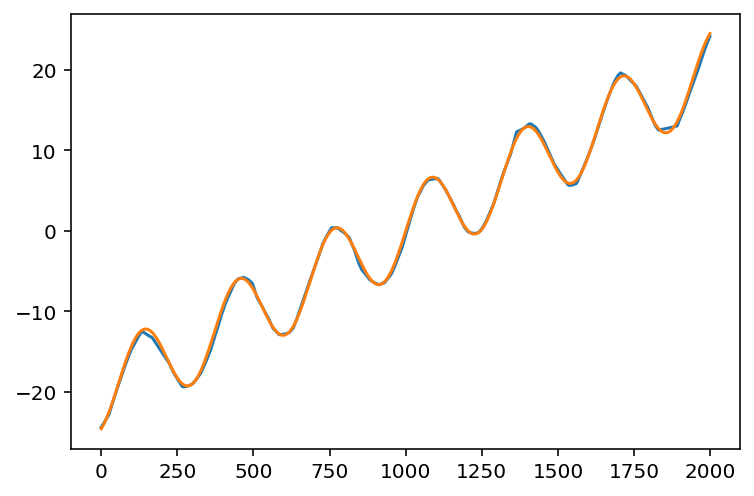

In [25]:
plt.plot(p.flatten())
plt.plot(y)

In [26]:
np.astype(1, np.float16)

AttributeError: module 'numpy' has no attribute 'astype'

In [32]:
a.astype(np.uint8)

array(1, dtype=uint8)